# <center>Lab 04: OLS Linear Regression</center>

## Mục lục
- [Chuẩn bị](#c1)
- [Hồi quy tuyến tính sử dụng phương pháp bình phương tối thiểu (OLS Linear Regression)](#c2)
- [Phương pháp đo lường độ lỗi (sai số)](#c3)

## Chuẩn bị <a class="anchor" id="c1"></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt

### Dữ liệu

Sử dụng dữ liệu từ Bài 7 trong Bài tập 4 (Exercise 04).
Một vật rơi theo phương thẳng đứng theo phương trình sau:

$$s = s_0 + v_0t + \frac{1}{2}gt^2 \ (*)$$

Người ta thực hiện thí nghiệm thu được kết quả như sau:

| t (x) | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 |
|---|---|---|---|---|---|
| s (y) | -0.18 | 0.31 | 1.03 | 2.48 | 3.73 |

### Trực quan hóa

In [86]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5]).reshape(-1, 1)
y = np.array([-0.18, 0.31, 1.03, 2.48, 3.73]).reshape(-1, 1)
x, y

(array([[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5]]),
 array([[-0.18],
        [ 0.31],
        [ 1.03],
        [ 2.48],
        [ 3.73]]))

In [87]:
def plot_data(x, y):
    ''' 
    This function is used to plot the data. It plots the data as a scatter plot using the plt.scatter() function.

    Parameters
    ----------
    x : np.array
        Input data
    y : np.array
        Output data

    Returns
    -------
    None
    '''


    plt.scatter(x, y, color='b', marker='o')
  
    plt.xlabel('x')
    plt.ylabel('y')
  
    plt.grid()
    plt.show()

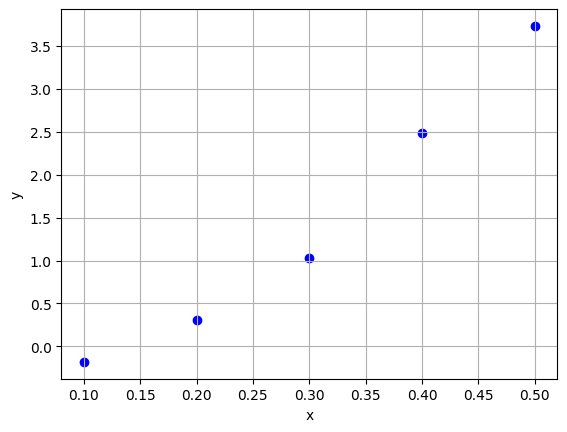

In [88]:
plot_data(x, y)

## Hồi quy tuyến tính sử dụng phương pháp bình phương tối thiểu (OLS Linear Regression) <a class="anchor" id="c2"></a>

Ta cần tìm nghiệm của phương trình $Ax \approx b$.

Xét ma trận **A** có kích thước *m x n* (*m* > *n*) và vector (cột) **b** có kích thước *m*. Ta có chuẩn Euclidean của bình phương phần dư $r$ của $Ax - b$ như sau:

**$$r = ||Ax - b||^{2} \ \ \ \  (1) $$**


Để giải được nghiệm $x$ cho hệ phương trình, ta thực hiện tối thiểu hóa công thức (1) được nghiệm $x$ của hệ phương trình được tính như sau:

$$x = (A^T A)^{-1} A^T b$$

*Note: $(A^T A)^{-1} A^T$ là ma trận giả nghịch đảo của A.*

Bài thực hành này sử dụng tên gọi khác cho đầu vào, đầu ra và tham số trong hồi quy tuyến tính như sau:
- $A \to X$
- $b \to y$
- $x \to w$ ($w$: weight)

$Ax \approx b \to Xw \approx y$ hay $ Xw = y$ ($y$ được gọi là đường hồi quy (regression line)).

### Tiền xử lý

Tiền xử lý dữ liệu theo phương trình: $$s = s_0 + v_0t + \frac{1}{2}gt^2$$

In [89]:
def preprocess(x):
    ''' 
    This function is used to preprocess the data. It adds a column of ones to the input data and squares the input data.

    Parameters
    ----------
    x : np.array
        Input data

    Returns
    -------
    X : np.array
        Preprocessed input data
    '''
    X = np.hstack((np.ones((x.shape[0], 1)), x, x**2))

    return X

In [90]:
x, y

(array([[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5]]),
 array([[-0.18],
        [ 0.31],
        [ 1.03],
        [ 2.48],
        [ 3.73]]))

In [91]:
X = preprocess(x)
X, y

(array([[1.  , 0.1 , 0.01],
        [1.  , 0.2 , 0.04],
        [1.  , 0.3 , 0.09],
        [1.  , 0.4 , 0.16],
        [1.  , 0.5 , 0.25]]),
 array([[-0.18],
        [ 0.31],
        [ 1.03],
        [ 2.48],
        [ 3.73]]))

### OLS Linear Regression

In [92]:
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w   # Equivalent to np.dot(X, self.w). But why?

In [93]:
lr = OLSLinearRegression().fit(X, y)

In [94]:
lr.get_params()

array([[-0.398     ],
       [ 0.34714286],
       [16.07142857]])

### Trực quan hóa

In [95]:
def plot_regression(lr, x, y):  
    ''' 
    This function is used to plot the regression line and regression errors (residual).

    Parameters
    ----------
    lr : object
        Linear regression object
    x : np.array
        Input data
    y : np.array
        Output data

    Returns
    -------
    None
    '''

    # Find predicted values
    y_pred = lr.predict(preprocess(x))

    # Calculate data for regression line
    x_line = np.linspace(np.min(x), np.max(x), 1000).reshape(-1, 1)
    X_line_preproc = preprocess(x_line)
    y_line = lr.predict(X_line_preproc)
    
    # Plot data/lines
    _, ax = plt.subplots()

    ax.scatter(x, y, color='b', marker='o')                     # Plot data
    ax.plot(x_line, y_line, color='k')                          # Plot regression line
    ax.vlines(x, y, y_pred, color='r', linestyles='dashed')     # Plot regression errors (residual)
  
    # Set labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.grid()
    plt.show()

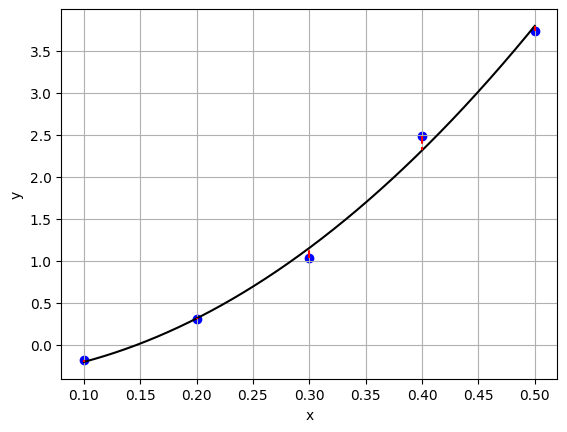

In [96]:
plot_regression(lr, x, y)

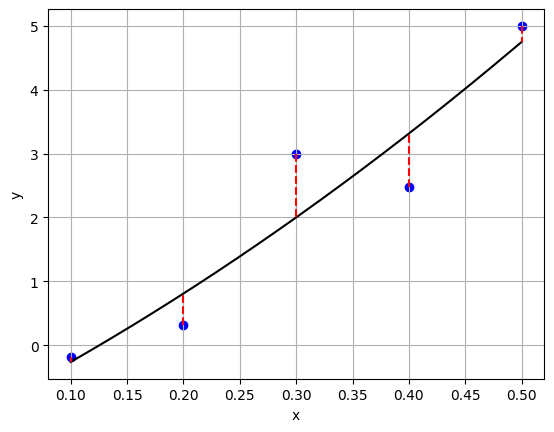

In [97]:
# Test for a different dataset
x_t = np.array([0.1, 0.2, 0.3, 0.4, 0.5]).reshape(-1, 1)
y_t = np.array([-0.18, 0.31, 3, 2.48, 5]).reshape(-1, 1)
x_t, y_t
X_t = preprocess(x_t)
lr_t = OLSLinearRegression().fit(X_t, y_t)
plot_regression(lr_t, x_t, y_t)

## Phương pháp đo lường độ lỗi <a class="anchor" id="c3"></a>

### Sai số (độ lỗi) tuyệt đối trung bình (MAE - Mean Absolute Error)

MAE được dùng để ước lượng **trung bình của sai số (độ lỗi) tuyệt đối**, được tính bằng công thức:

$$MAE = \frac{1}{n} \sum_{n}^{i = 1}|y_i - \hat{y_i}|$$

Trong đó:
- $n$: số lượng mẫu quan sát
- $y_i$: giá trị mục tiêu của mẫu thứ $i$
- $\hat{y_i}$: giá trị mục tiêu của mẫu thứ $i$ được dự đoán từ mô hình hồi quy tuyến tính

In [98]:
def mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y.ravel() - y_hat.ravel()))   # Quick questions: What does the ravel() do? 
                                                            # Why do we use it instead of np.mean(np.abs(y - y_hat))?

In [99]:
y_hat = lr.predict(X)
mae(y, y_hat)

0.07611428571428971

### Sai số (độ lỗi) bình phương trung bình (MSE - Mean Squared Error)

MSE được dùng để ước lượng **trung bình của sai số (độ lỗi) bình phương**, được tính bằng công thức:

$$MSE = \frac{1}{n} \sum_{n}^{i = 1}(y_i - \hat{y_i})^2$$

In [100]:
def mse(y, y_hat):
    ''' 
    This function is used to calculate the mean squared error (MSE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean((y.ravel() - y_hat.ravel())**2) : float
        Mean squared error
    '''

    return np.mean((y.ravel() - y_hat.ravel())**2)

In [101]:
y_hat = lr.predict(X)
mse(y, y_hat)

0.009540571428571386

### Căn bậc hai của sai số (độ lỗi) bình phương trung bình (RMSE - Root Mean Squared Error)

RMSE được dùng để ước lượng **căn bậc hai trung bình của sai số (độ lỗi) bình phương**, được tính bằng công thức:

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{n}^{i = 1}(y_i - \hat{y_i})^2}$$

In [102]:
def rmse(y, y_hat):
    ''' 
    This function is used to calculate the root mean squared error (RMSE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2)) : float
        Root mean squared error
    '''


    return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))

In [103]:
y_hat = lr.predict(X)
rmse(y, y_hat)

0.09767584874763764

<center>---The End---</center>